In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Thyroid_Diff.csv')
data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


## data cleaning

In [3]:
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [4]:
data.duplicated().sum()

19

In [5]:
#We drop duplicates values and just keep one of them
data = data.drop_duplicates()

In [6]:
data.duplicated().sum()

0

This dataset is already cleaned. 

## data visualization

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    object
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    object
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


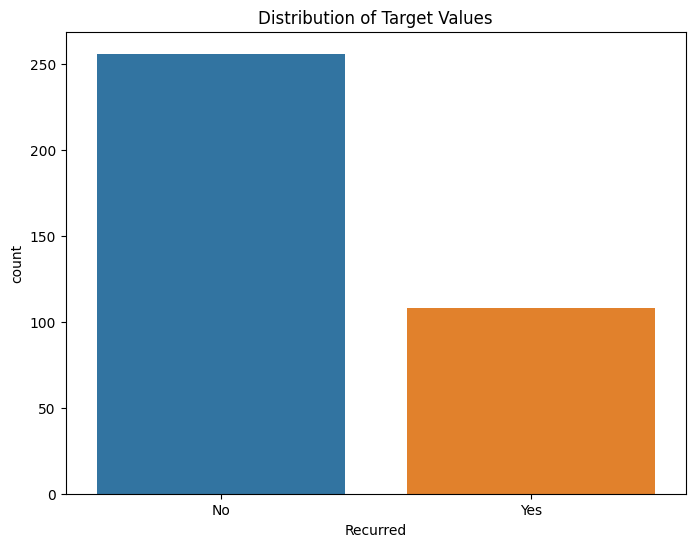

percentage of reccured tyroid disease is 0.7032967032967034
percentage of not reccured tyroid disease is 0.7032967032967034


In [18]:
#we print histogram of target value
target=data['Recurred']
plt.figure(figsize=(8,6))
sns.countplot(x=target)
plt.title('Distribution of Target Values')
plt.show()

yes=target.value_counts()[0]/len(target)
no=target.value_counts()[0]/len(target)
print(f'percentage of reccured tyroid disease is {yes}')
print(f'percentage of not reccured tyroid disease is {no}')

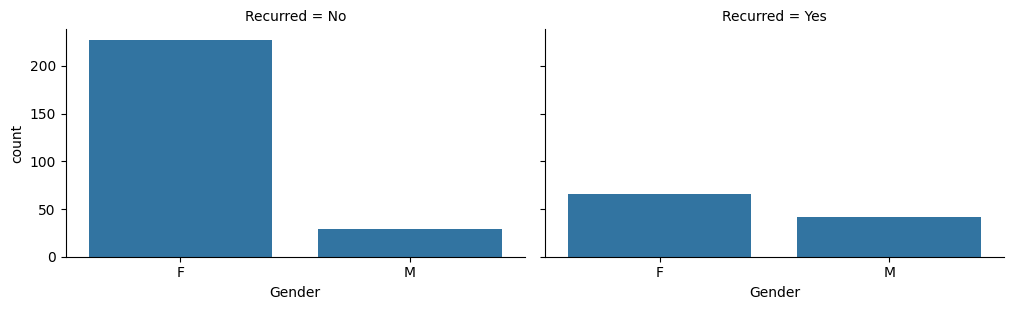

In [21]:
#Gender reccured
grid = sns.FacetGrid(data, col='Recurred', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender', order=sorted(data['Gender'].unique()))
plt.show()

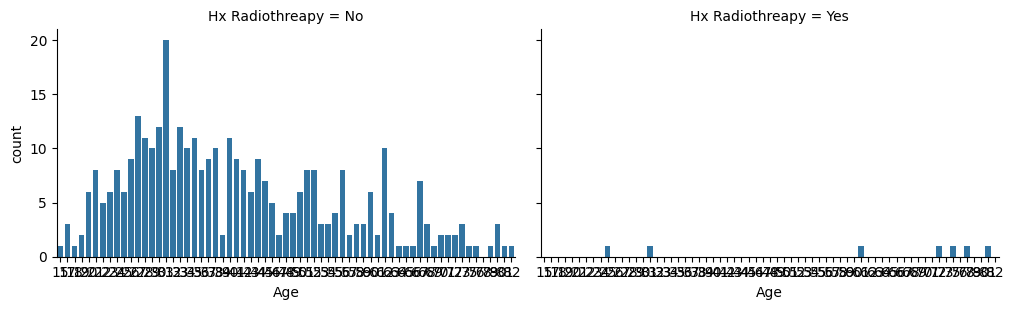

In [25]:
#Age of people who is have already radiotherapy
grid = sns.FacetGrid(data, col='Hx Radiothreapy', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Age', order=sorted(data['Age'].unique()))
plt.show()

<Axes: ylabel='count'>

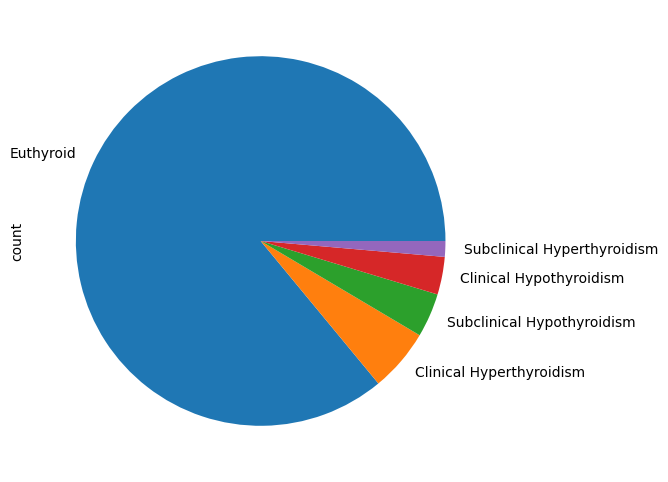

In [28]:
#distribution of Thyroid Function
plt.figure(figsize=(6,6))
data["Thyroid Function"].value_counts().plot.pie()

Euthyroid: fonctionnement normal de la glande thyroïde
Clinical hyperthyroidism: fonctionnement excessif de la thyroïde
Clinical hypothyroidism: fonctionnement inssuffisant de la thyroïde
Subclinical hyperthyroidism: taux de TSH légèrement élevé mais taux de T3 et T4 restent dans la normale
Subclinical hypothyroidism: taux de TSH légèrement bas mais taux de T3 et T4 restent dans la normale

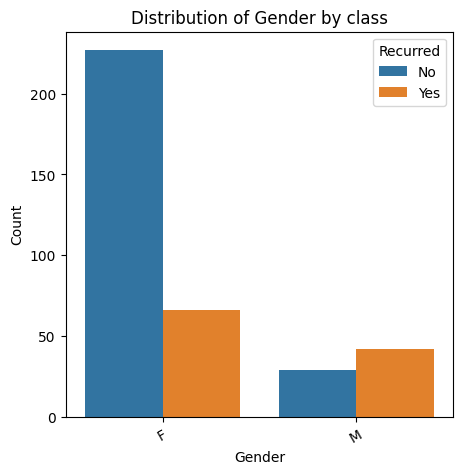

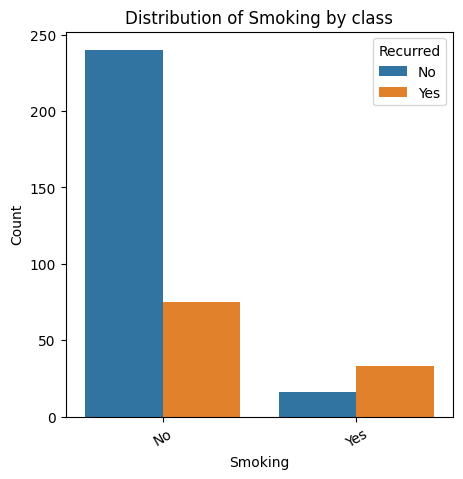

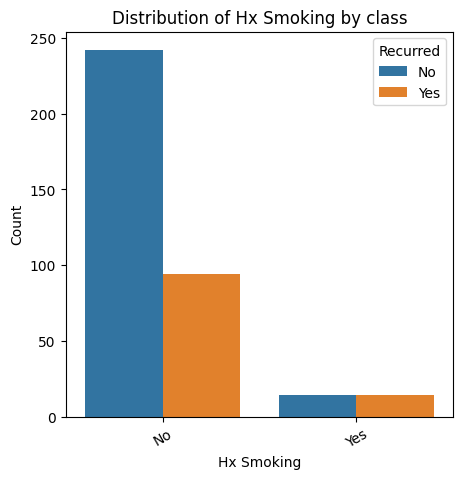

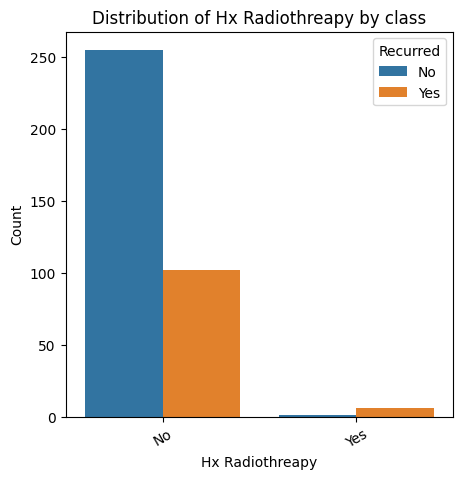

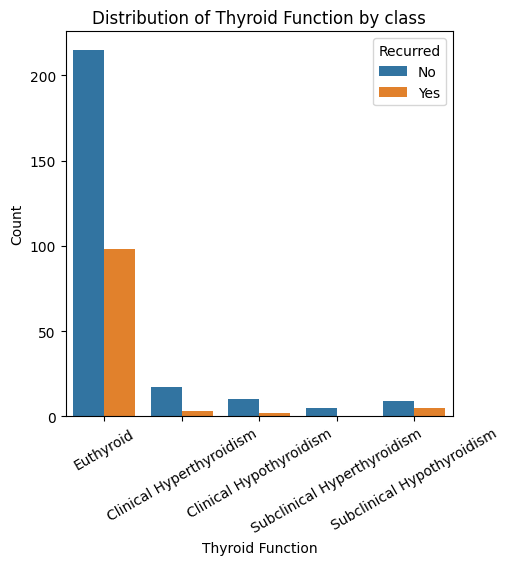

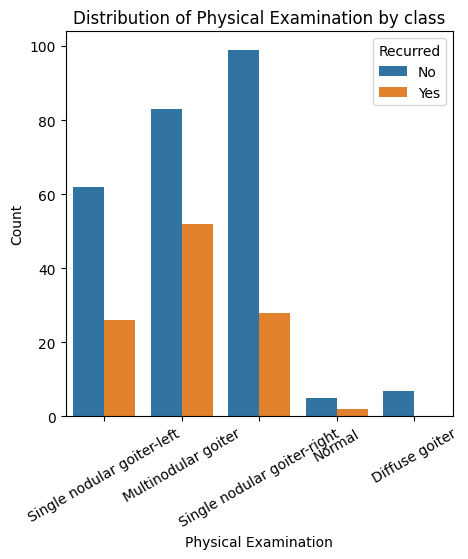

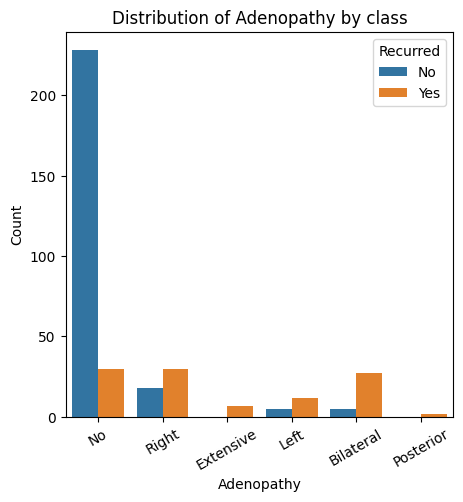

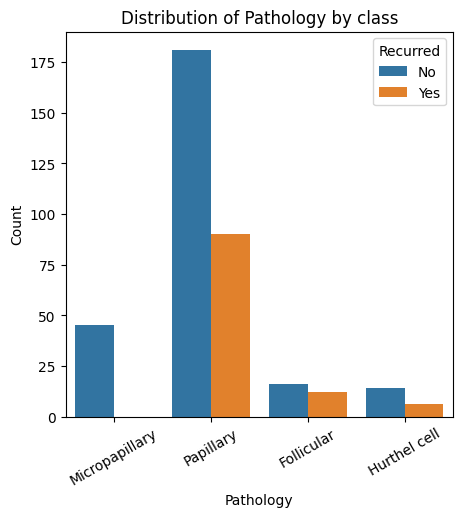

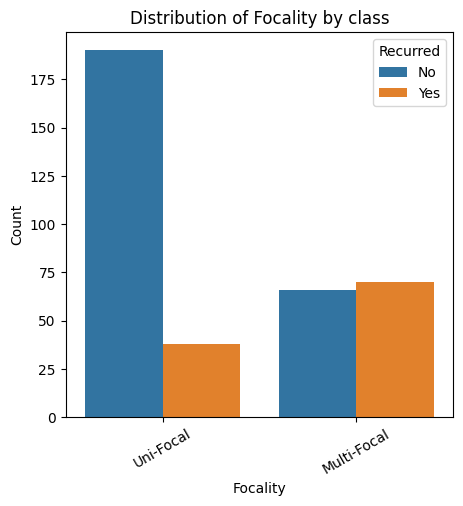

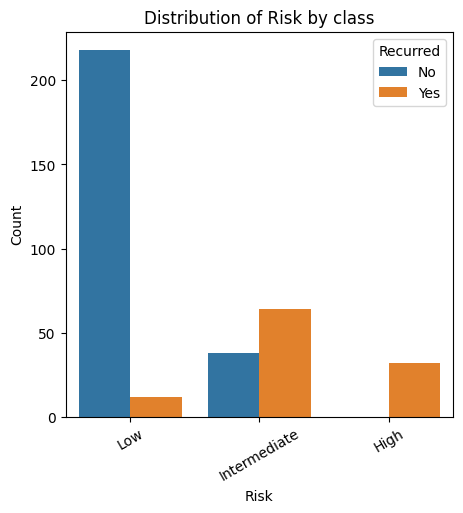

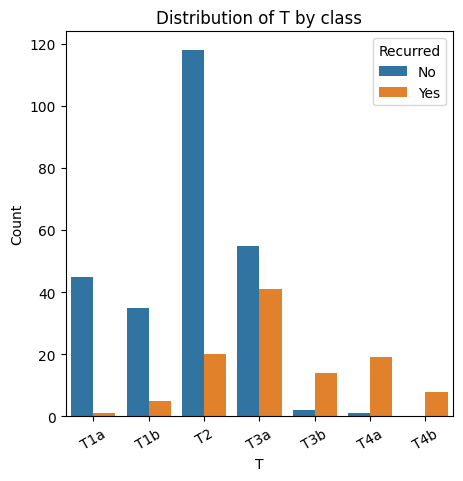

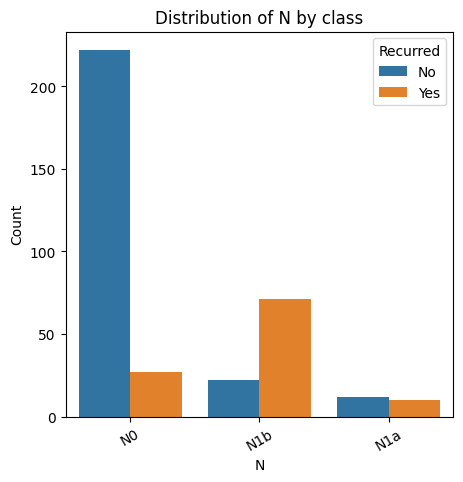

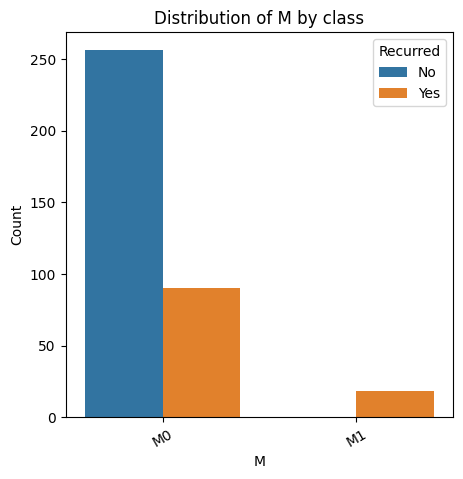

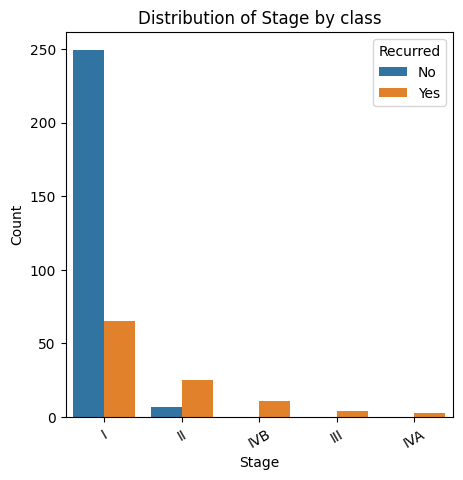

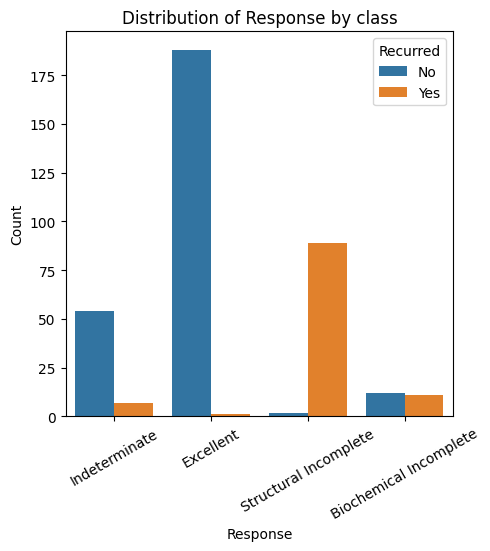

In [35]:
for i in range (1, 16):
    column_name=data.columns[i]
    plt.figure(figsize=(5,5))
    sns.countplot(x=column_name, data=data, hue='Recurred')
    plt.title(f'Distribution of {column_name} by class')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.show()

In [36]:
data.describe()

,Age
count,364.00000
mean,41.25000
std,15.31436
min,15.00000
25%,30.00000
50%,38.00000
75%,52.00000
max,82.00000
